## Visualizing Data

Here, we will visualize the data that was cleaned and analysed by another script. We will visually explore the data, try to draw conclusions, and explain our findings.

We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Crash Fatalities by Borough](#crash_fatalities_by_borough)
* [Number of Deaths by Hour](#Fataities_by_hour)
* [Number of Accidents by Season](#accidents_by_season)
* [Fatal Car Crash Locations](#car_crash_locations)
* [Contributing Factor Trends](#contributing_factor_trends)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)

First, let's bring in the cleaned, prepared data. Since it was saved as a .csv, we'll have to reconvert a few things (dates to datetime, for example).

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

clean_nyc1 = pd.read_csv(r"C:\Users\Inspiration\Desktop\nyc_data\clean_nyc1_data.csv", low_memory=False)

Let's look the first few rows of the dataset. 

In [2]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2019-08-05 00:00:00,2019-12-03 16:30:00,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck,16,Summer
1,2019-08-27 00:00:00,2019-12-03 16:02:00,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle,16,Summer
2,2019-08-15 00:00:00,2019-12-03 17:57:00,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN,17,Summer
3,2019-08-06 00:00:00,2019-12-03 09:45:00,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike,9,Summer
4,2019-08-11 00:00:00,2019-12-03 22:23:00,NaN,NaN,40.858210,-73.916790,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,station wagon/sport utility vehicle,22,Summer


In [3]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016002 entries, 0 to 1016001
Data columns (total 20 columns):
crash_date                       1016002 non-null object
crash_time                       1016002 non-null object
borough                          667250 non-null object
zip_code                         667111 non-null object
latitude                         895478 non-null float64
longitude                        895478 non-null float64
persons_injured                  1016002 non-null float64
persons_killed                   1016002 non-null float64
pedestrians_injured              1016002 non-null int64
pedestrians_killed               1016002 non-null int64
cyclist_injured                  1016002 non-null int64
cyclist_killed                   1016002 non-null int64
motorist_injured                 1016002 non-null int64
motorist_killed                  1016002 non-null int64
contributing_factor_vehicle_1    1016002 non-null object
contributing_factor_vehicle_2    92654

Let's  change the `crash_date` and `crash_time` columns into a datetime object.

In [5]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc1['crash_time'])
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016002 entries, 0 to 1016001
Data columns (total 20 columns):
crash_date                       1016002 non-null datetime64[ns]
crash_time                       1016002 non-null datetime64[ns]
borough                          667250 non-null object
zip_code                         667111 non-null object
latitude                         895478 non-null float64
longitude                        895478 non-null float64
persons_injured                  1016002 non-null float64
persons_killed                   1016002 non-null float64
pedestrians_injured              1016002 non-null int64
pedestrians_killed               1016002 non-null int64
cyclist_injured                  1016002 non-null int64
cyclist_killed                   1016002 non-null int64
motorist_injured                 1016002 non-null int64
motorist_killed                  1016002 non-null int64
contributing_factor_vehicle_1    1016002 non-null object
contributing_factor_ve

We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called `hour` in which we will only have the hours instead of hours and minutes.

In [6]:
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc1.crash_time)
clean_nyc1['crash_hour'] = clean_nyc1['crash_time'].dt.hour
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season,crash_hour
0,2019-08-05,2019-12-03 16:30:00,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck,16,Summer,16
1,2019-08-27,2019-12-03 16:02:00,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle,16,Summer,16
2,2019-08-15,2019-12-03 17:57:00,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN,17,Summer,17
3,2019-08-06,2019-12-03 09:45:00,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike,9,Summer,9
4,2019-08-11,2019-12-03 22:23:00,NaN,NaN,40.858210,-73.916790,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,station wagon/sport utility vehicle,22,Summer,22


## Number of deaths by borough <a id='Fataities_by_borough'></a>

Let's see the average of killed persons by borough with the collisions count.

In [7]:
clean_nyc1.groupby('borough').persons_killed.agg(['count', 'mean'])

,count,mean
borough,,
bronx,85905,0.001129
brooklyn,191127,0.001287
manhattan,178725,0.000783
queens,183489,0.001210
staten island,28004,0.001571


Let's graph this with a bar chart.

Text(0.5, 0, ' ')

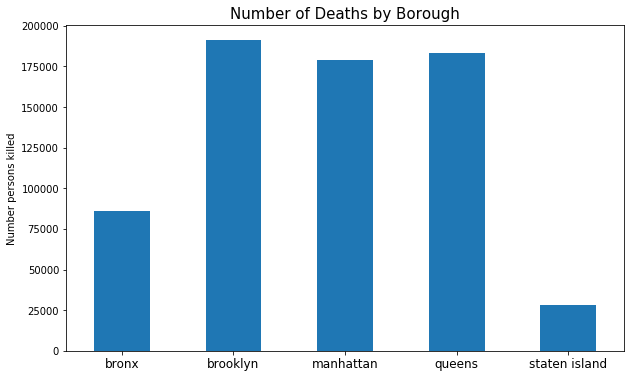

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.count().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

It looks like Staten Island and Queens have the highest probability of death, meanwhile Manhattan has the lowest, which may be due to its smaller size.

## Crash fatalities by borough <a id='crash_fatalities_by_borough'></a>

In order to build a visualization from the dataframe, we will need to manipulate the data. We will pull a few columns into a new dataframe, grouping crashes by borough and month, along with the sum of persons killed.

Before we start slicing data to examine it, we will quickly change the `crash_date` column into a datetime object, making the date easier to work with later.

In [9]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1.tail()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season,crash_hour
1015997,2012-07-08,2019-12-03 22:30:00,queens,11368,40.742096,-73.867473,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,passenger vehicle,passenger vehicle,22,Summer,22
1015998,2012-07-21,2019-12-03 22:46:00,brooklyn,11226,40.651741,-73.965241,0.0,0.0,0,0,0,0,0,0,road defects,unspecified,suv,unknown,22,Summer,22
1015999,2012-07-09,2019-12-03 16:45:00,NaN,NaN,NaN,NaN,5.0,0.0,0,0,0,0,5,0,driver inattention/distraction,fatigued/drowsy,passenger vehicle,livery vehicle,16,Summer,16
1016000,2012-07-09,2019-12-03 14:35:00,NaN,NaN,40.791492,-73.935763,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,passenger vehicle,passenger vehicle,14,Summer,14
1016001,2012-07-18,2019-12-03 09:20:00,manhattan,10024,40.779479,-73.973573,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,van,9,Summer,9


In [10]:
crashes_by_month = clean_nyc1.groupby(['borough', pd.Grouper(key='crash_date', freq='M')]).persons_killed.sum().copy()
crashes_by_month.head()

borough  crash_date
bronx    2012-07-31    3.0
         2012-08-31    4.0
         2012-09-30    2.0
         2012-10-31    1.0
         2012-11-30    0.0
Name: persons_killed, dtype: float64

This looks nice and grouped to us, but computers will have a hard time manipulating this data without an index. We will set one now with the 'reset_index' function.

In [11]:
crashes_by_month = crashes_by_month.reset_index()
crashes_by_month.tail()

,borough,crash_date,persons_killed
440,staten island,2019-07-31,1.0
441,staten island,2019-08-31,0.0
442,staten island,2019-09-30,0.0
443,staten island,2019-10-31,0.0
444,staten island,2019-11-30,0.0


Finally, we can get to the good stuff and look at this data visually.

In [ ]:
import plotly.express as px
fig = px.scatter(crashes_by_month,x ='crash_date',y ='persons_killed', color='borough', opacity=0.9)
fig

# Edit the layout
fig.update_layout(title='Crash Fatalities by Borough',
                  xaxis_title='Month',
                  yaxis_title='Number of People Killed'
                 )

# please use google colab to see the visualization.

While this information is useful analytically, it does not give a good sense of the dangers to nyc residents and visitors. We will attempt to show that in the next visualization.

## Number of deaths by hour  <a id='Fataities_by_hour'></a>

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. 

Text(0.5, 0, 'time')

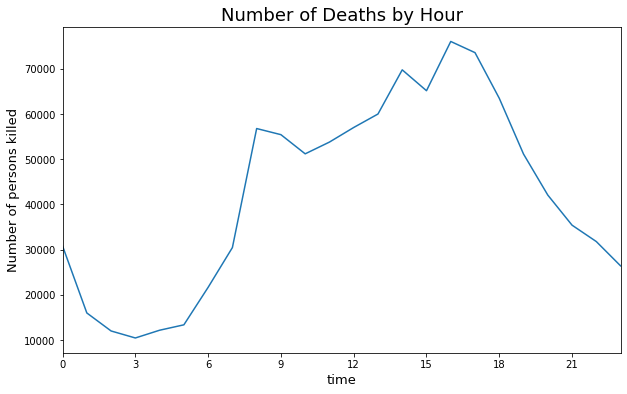

In [12]:
clean_nyc1.groupby(clean_nyc1.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Deaths by Hour', fontsize=18)
plt.ylabel('Number of persons killed', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like number of deaths goes up between 14:00 and 17:00. It decreases between 2:00 and 7:00, during when most people sleep.

## Number of accidents by season <a id='accidents_by_season'></a>

Let's see the number of accidents by season.

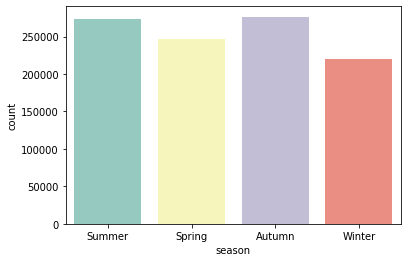

In [13]:
import seaborn as sns
ax = sns.countplot(x='season', data=clean_nyc1, palette='Set3')

Autumn and Summer have higher number of accidents compared to Spring and Winter.

## Fatal Car Crash Locations <a id='car_crash_locations'></a>

We will have to prepare a new dataframe with the latitude and longitutde values, before this can work. We'll also include other columns we may want to display in the visualiztion in some way, shape, or form.

In [14]:
crash_locations = clean_nyc1[['borough', 'crash_date', 'latitude' ,'longitude','persons_killed',
                           'cyclist_killed', 'pedestrians_killed','motorist_killed']].copy()
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,queens,2019-08-05,40.676052,-73.790184,0.0,0,0,0
1,brooklyn,2019-08-27,40.657780,-73.951096,0.0,0,0,0
2,manhattan,2019-08-15,40.718143,-73.993835,0.0,0,0,0
3,manhattan,2019-08-06,40.745440,-73.975400,0.0,0,0,0
4,NaN,2019-08-11,40.858210,-73.916790,1.0,0,0,1


The first thing we will do is remove any non-fatal rows. To do so, we must change the 0.0 to a 0 in the `persons_killed` column. The problem is that these values are currently not classified as integers.

In [15]:
crash_locations.dropna(subset = ['persons_killed'], how='all', inplace=True)
crash_locations['persons_killed'] = crash_locations.persons_killed.astype(int)
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,queens,2019-08-05,40.676052,-73.790184,0,0,0,0
1,brooklyn,2019-08-27,40.657780,-73.951096,0,0,0,0
2,manhattan,2019-08-15,40.718143,-73.993835,0,0,0,0
3,manhattan,2019-08-06,40.745440,-73.975400,0,0,0,0
4,NaN,2019-08-11,40.858210,-73.916790,1,0,0,1


Much better. Now to drop the rows.

In [16]:
crash_locations = crash_locations[crash_locations.persons_killed != 0].reset_index()
crash_locations.head()

,index,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,4,NaN,2019-08-11,40.858210,-73.91679,1,0,0,1
1,345,queens,2019-08-02,40.725918,-73.89535,1,0,1,0
2,402,brooklyn,2019-08-24,40.644814,-73.90483,1,0,0,1
3,535,brooklyn,2019-08-11,40.619984,-73.96427,1,1,0,0
4,687,NaN,2019-08-29,40.834890,-73.86630,1,0,1,0


Let's take a look to see if we can clean up this dataframe anymore.

In [17]:
crash_locations.shape

(1126, 9)

In [18]:
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.126000e+03,982.000000,982.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,5.552735e+05,40.679274,-73.840205,1.052398,0.087922,0.459147,0.504440
std,3.026693e+05,1.302225,2.360520,0.345007,0.286427,0.534682,0.594402
min,4.000000e+00,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,2.868272e+05,40.660287,-73.966117,1.000000,0.000000,0.000000,0.000000
50%,5.945780e+05,40.718328,-73.917549,1.000000,0.000000,0.000000,0.000000
75%,8.315675e+05,40.775512,-73.858000,1.000000,0.000000,1.000000,1.000000
max,1.015496e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


It looks like we have 1126 rows, and we have missing lat/long values. For our purposes, we will drop those values now. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [19]:
crash_locations.dropna(subset = ['latitude'], how='all', inplace=True)
crash_locations.dropna(subset = ['longitude'], how='all', inplace=True)
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,9.820000e+02,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,5.406853e+05,40.679274,-73.840205,1.057026,0.087576,0.476578,0.491853
std,3.049162e+05,1.302225,2.360520,0.365157,0.286403,0.540850,0.601929
min,4.000000e+00,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,2.652548e+05,40.660287,-73.966117,1.000000,0.000000,0.000000,0.000000
50%,5.553075e+05,40.718328,-73.917549,1.000000,0.000000,0.000000,0.000000
75%,8.199682e+05,40.775512,-73.858000,1.000000,0.000000,1.000000,1.000000
max,1.015496e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


And finally, we can map these values.

In [ ]:
fig = px.scatter_mapbox(crash_locations, lat='latitude', lon='longitude',
                        size = "persons_killed",
                        hover_name="persons_killed",
                        hover_data=["pedestrians_killed", "cyclist_killed", "motorist_killed"],
                        color="persons_killed",
                        range_color=[1,8],
                        opacity=0.5,
                        width =850,
                        zoom=9,
                       )
fig.update_layout(title='Fatal Car Crash Locations')
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=286)
fig

# please use google colab to see the visualization.

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though we must remember that this map represents deaths over nearly a decade.

## Contributing factor trends <a id='contributing_factor_trends'></a>

We will use Plotly, specifically, `plotly.express` to visualize some contributing factor trends.

In [20]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['driver inexperience', 'driver inattention/distraction',
       'road defects', 'outside error', 'car defects', 'drugs (illegal)',
       'illness'], dtype=object)

In [ ]:
import plotly.graph_objects as go
fig = px.box(clean_nyc1, x="persons_killed", y="contributing_factor_vehicle_1")
fig.show()

# please use google colab to see the visualization.

Most collisions that result in one or two persons' death are due to road defects, meanwhile most collisions that result with no  death are due to an outside error.

Let's see when the accidents, in which more than one person die, tend to occur.

In [ ]:
fig = px.scatter (clean_nyc1, x= 'persons_killed', y= 'hour')
fig.show()

# please use google colab to see the visualization.

The collisions that result with more than one persons death tend to occur between 22:00 and 04:00.

## Contributing factors to crash fatalities <a id='Factor_Bar_Plot'></a>

We will use the 'value_counts' function to see how frequently contributing factor values appear in the data.

In [21]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

driver inexperience               449565
driver inattention/distraction    366402
road defects                       60520
outside error                      56837
illness                            47225
car defects                        19264
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

For now, we'll just analyze the first contributing factor to get a general sense of the data.

Next we'll look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [22]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
2,driver inexperience,450.0
1,driver inattention/distraction,288.0
6,road defects,201.0
4,illness,96.0
5,outside error,73.0


Finally, let's drop 0's if we have any.

In [23]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
6,road defects,201.0
4,illness,96.0
5,outside error,73.0
3,drugs (illegal),71.0
0,car defects,6.0


Yes, let's remove those zero values now.

In [24]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
6,road defects,201.0
4,illness,96.0
5,outside error,73.0
3,drugs (illegal),71.0
0,car defects,6.0


Great. Now let's visualize fatal car crash causes in NYC.

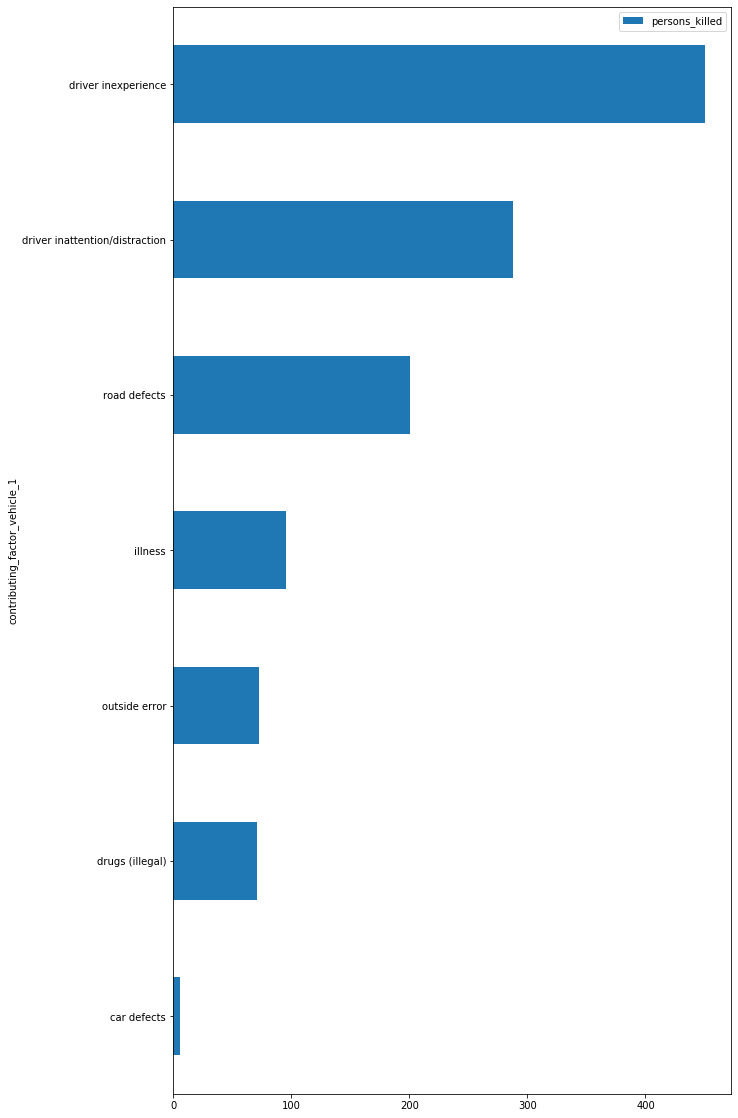

In [25]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist <a id='Fataity_Grouped_Series'></a>

For this we'll use Seaborn to compare the distributions of fatalities by the category of persons killed. We'll group each category from our original dataframe into it's own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [26]:
killed_motorists = clean_nyc1.groupby('crash_date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('crash_date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('crash_date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

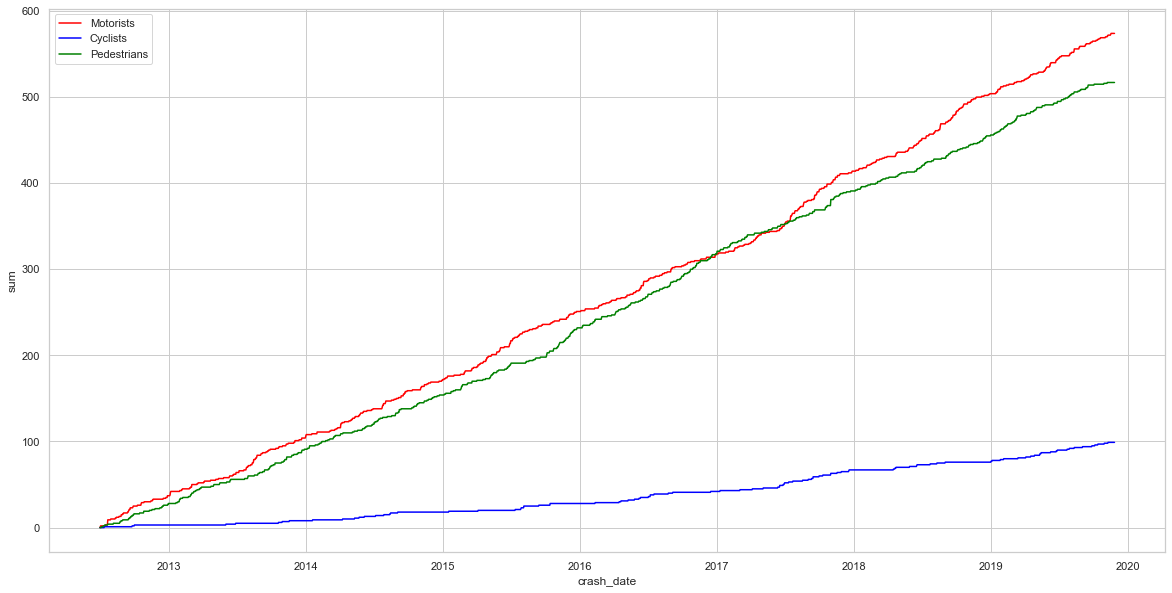

In [27]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='crash_date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

### Fatal crash frequency over time <a id='Fatality_Time_Scatterplot'></a>

To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occured into a new dataframe, then we need to group by date and sum.

In [28]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season,crash_hour
4,2019-08-11,2019-12-03 22:23:00,NaN,NaN,40.858210,-73.91679,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,station wagon/sport utility vehicle,22,Summer,22
345,2019-08-02,2019-12-03 10:25:00,queens,11378,40.725918,-73.89535,0.0,1.0,0,1,0,0,0,0,driver inexperience,NaN,dump,NaN,10,Summer,10
402,2019-08-24,2019-12-03 16:30:00,brooklyn,11236,40.644814,-73.90483,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,pick-up truck,16,Summer,16
535,2019-08-11,2019-12-03 12:27:00,brooklyn,11230,40.619984,-73.96427,1.0,1.0,0,0,0,1,1,0,driver inexperience,unspecified,sedan,bike,12,Summer,12
687,2019-08-29,2019-12-03 02:35:00,NaN,NaN,40.834890,-73.86630,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,dump,NaN,2,Summer,2


Now to group by `crash_date`... We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting chronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not have an impact on our analysis.

In [29]:
clean_nyc1.groupby('crash_date').persons_killed.sum().reset_index().head(20)

,crash_date,persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,0.0
8,2012-07-09,0.0
9,2012-07-10,1.0


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [30]:
counted_lethal_crashes = clean_nyc1.groupby(['crash_date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69477 entries, 0 to 69476
Data columns (total 4 columns):
crash_date                       69477 non-null datetime64[ns]
borough                          69477 non-null object
contributing_factor_vehicle_1    69477 non-null object
persons_killed                   69477 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB


Let's visualize it!

[Text(0, 0.5, 'Killed Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Number of people killed by motorists in NYC')]

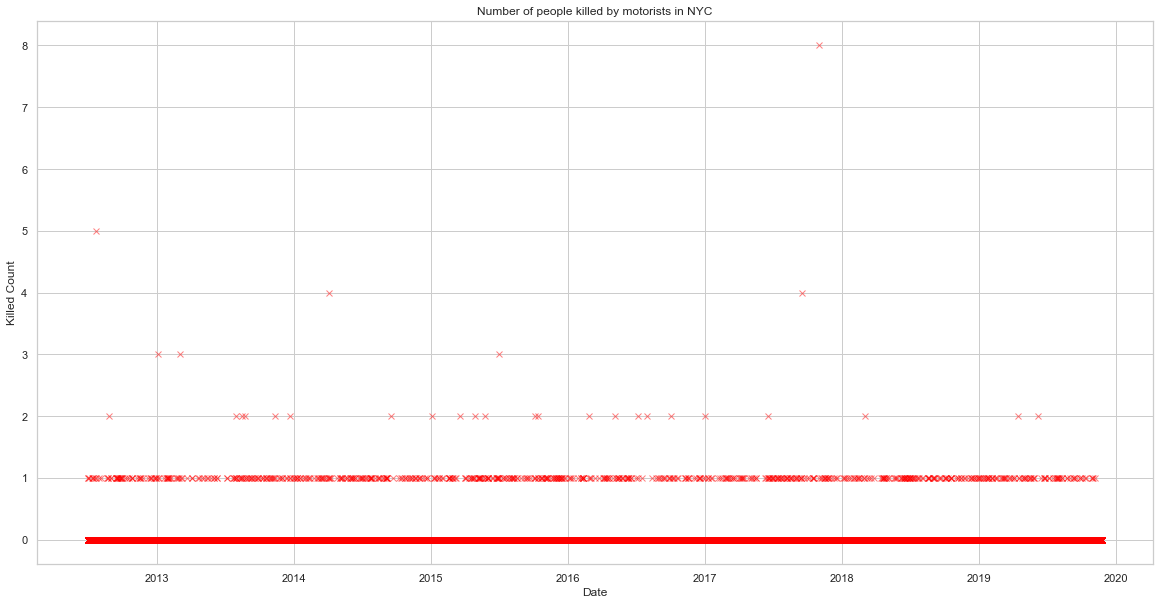

In [31]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


x = counted_lethal_crashes['crash_date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

We have succesfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Crash factor percentages in Queens <a id='queens_crash_causes'></a>

Let's check out our data.

In [32]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         191127
queens           183489
manhattan        178725
bronx             85905
staten island     28004
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.

I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first vehicle involved in the crash.

In [33]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data.head()

,borough,contributing_factor_vehicle_1
0,queens,driver inexperience
5,queens,driver inexperience
10,queens,road defects
21,queens,driver inexperience
25,queens,car defects


For this data, what are the numbers for each contributing factor. 

In [34]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

driver inexperience               80963
driver inattention/distraction    69629
road defects                      12134
illness                            8863
outside error                      5550
drugs (illegal)                    3436
car defects                        2914
Name: contributing_factor_vehicle_1, dtype: int64

Now we will find the percentage contribution of each factor for the burough Queens and the first vehicle involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [35]:
total_reason_counts = reason_counts.sum()
total_reason_counts

183489

In [36]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

driver inexperience               44.124171
driver inattention/distraction    37.947234
road defects                       6.612930
illness                            4.830262
outside error                      3.024704
drugs (illegal)                    1.872592
car defects                        1.588106
Name: contributing_factor_vehicle_1, dtype: float64

The greatest impact to crash was 'driver inexperience'. 'Driver Inattention/Distraction' follows that. 

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

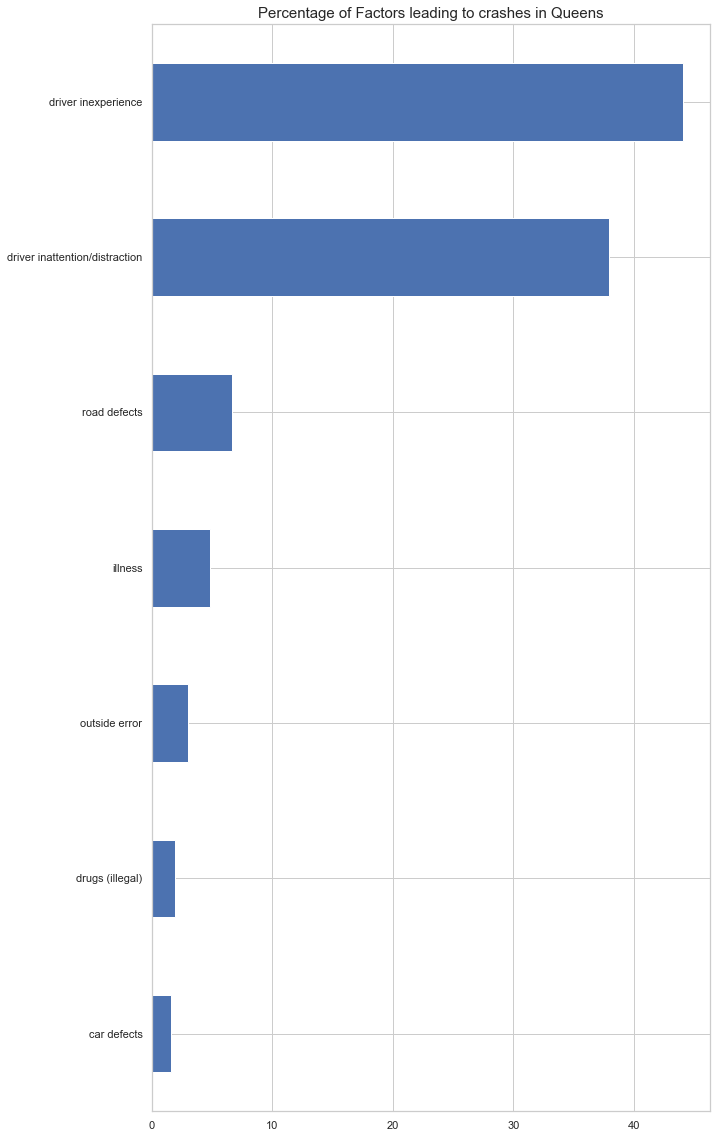

In [37]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Begining of the page](#Top)</center> <a id='Bottom'></a>